# **IEOR 4404  Simulation (Spring 2020)**

**Homework 5 [Total points: 60]**


**Due 11:59 PM, April 8**

Homework 5 consists of application-oriented exercises focusing on

* Application of simulations
* Composition method
* Homogeneous Poisson process
 

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)

In [1]:
#Your Name: Limeng Lu
#Your UNI: ll3359

In [2]:
#This imports all the packages you need for the homework (you might not use some of them)
#Please run this first
import numpy as np

import scipy.special as spsp

import scipy.stats as spst

import matplotlib.pyplot as plt

%matplotlib inline



<img src="https://www.pittsburghmagazine.com/content/uploads/2020/03/Screen-Shot-2020-03-25-at-10.53.08-AM.png" alt="Munch" width="300" />

#Exercise 1 [44 Points]

**Setting**

The Geometric distribution is often used to model the number of independent and identical Bernoulli trials needed to get the first success.

The PMF of a Geometrics distibution follows:
$PMF(x)=(1-p)^{x-1}p$, where $x=1, 2, 3, ...$

For this exercise, let's discuss an application of simulation based on this Geometric distribution.

Context:

To target a group of new users, a company decides to send out advertisements to the customers. They would like to assume that each advertisement has a probability of $p$ of converting a new customer to a regular buyer. They are interested in simulating the number of advertisements needed to make the conversions happen.



## Q1. [10 Points]

Let's assume that the conversion probability per advertisement is 0.1, the company is trying to target 2000 customers and make them all converted. That is, the company will keep on sending out advertisements to a customer until the customer becomes a regular customer.


* Generate the number of advertisements needed for each conversion. 
* Visualize the distribution of the 2000 samples collected.
* Repeat the simulation for 1000 rounds. Plot the distribution of the total number of advertisements needed for 2000 conversions.



<BarContainer object of 61 artists>

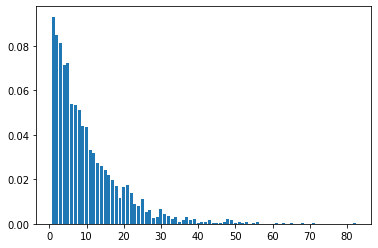

In [3]:
def simulation():
  u=np.random.rand(2000)
  p=0.1
  samples=1+np.floor((np.log(u)/np.log(1-p)))
  return samples
#plot the distribution of the number of advertisements needed
values,counts=np.unique(simulation(),return_counts=True)
plt.bar(values,counts/np.sum(counts))

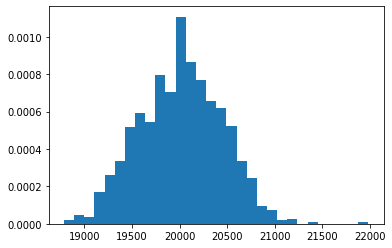

In [4]:
total_Ads=np.array([np.sum(simulation()) for i in range(1000)])
plt.hist(total_Ads,bins=30,density=True)
plt.show()

## Q2 [10 Points]

The company wants to assume that the consumers can be split into 3 segments

> * Segment 1: the conversion probability of each advertisement is 0.05. A consumer belongs to this segment with probability= 0.25
> * Segment 2: the conversion probability of each advertisement is 0.1. A consumer belongs to this segment with probability= 0.5
> * Segment 3: the conversion probability of each advertisement is 0.15. A consumer belongs to this segment with probability= 0.25

Again, let's work on 2000 randomly selected customers.

* Generate the number of advertisement needed for each conversion. 
* Visualize the distribution of the 2000 samples collected.
* Repeat the simulation 1000 rounds. Plot the distribution of the total number of advertisements needed for 2000 conversions.



<BarContainer object of 73 artists>

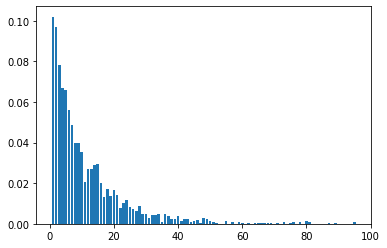

In [5]:
def simulation():
  #generate 2000 probabilities 
  u=np.random.rand(2000)
  p=0.1*(u<0.5)+0.05*(u>=0.5)*(u<0.75)+0.15*(u>=0.75)
  #generate the 2000 samples at the same time 
  samples=1+np.floor((np.log(np.random.rand(2000))/np.log(1-p)))
  return samples

values,counts=np.unique(simulation(),return_counts=True)
plt.bar(values,counts/np.sum(counts))

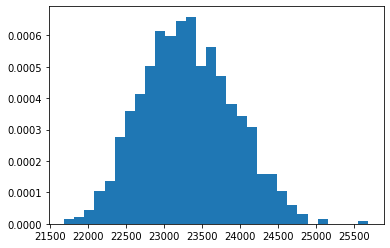

In [6]:
total_Ads=np.array([np.sum(simulation()) for i in range(1000)])
plt.hist(total_Ads,bins=30,density=True)
plt.show()

##Q3 [12 Points]

The company is doing the following:

They will start sending out advertisements to 2000 random customers. However, if a customer still has not been converted after $N$ advertisements, the company will stop sending advertisements to this customer and start sending out advertisements to a random new customer. The company will follow this process until it achieves 2000 conversions. In this way, the company might need to reach out to more than 2000 customers.

* Assuming $N=10$, generate the number of advertisement needed for each **converted** customer.
* Visualize the distribution of the 2000 samples collected.
* Repeat the simulation 1000 rounds. Plot the distribution of the following:
> 1.  the total number of advertisements (including those sent out on the unsuccessful ones) needed to get 2000 conversions.
> 2.  the total number of customers needed to be reached out.

<BarContainer object of 10 artists>

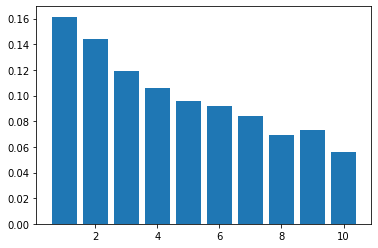

In [7]:
def simulation():
  size=0
  #total number of ads sent out
  totalA=0
  #total number of customres reached out 
  totalC=0
  N=10
  ad_convert=np.empty(2000)
  while (size<2000):
    #sending out advertisements to additional 2000-size customers, if 2000-size number of conversions is needed
    x=np.random.rand(2000-size)
    p=(x<0.5)*0.1+(x>=0.5)*(x<0.75)*0.05+(x>=0.75)*0.15
    u=np.random.rand(2000-size)
    ad_needed=1+np.floor(np.log(u)/np.log(1-p))
    #additional converted customers
    new_converted=ad_needed<=N
    new_size=size+np.sum(new_converted)
    #record number of ads for converted customers
    ad_convert[size:new_size]=ad_needed[new_converted]
    size=new_size
    
    totalC+=len(ad_needed)
    totalA+=np.sum(ad_needed[ad_needed<=N])+N*np.sum(ad_needed>N)
  return ad_convert,totalA,totalC

values,counts=np.unique(simulation()[0],return_counts=True)
plt.bar(values,counts/np.sum(counts))

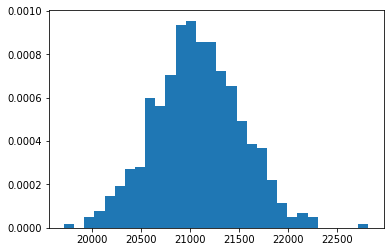

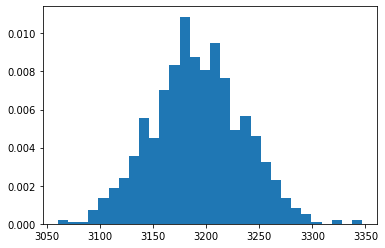

In [8]:
returns=np.array([simulation()[1:3] for i in range(1000)])
plt.hist(returns[:,0],density=True,bins=30)
plt.show()
plt.hist(returns[:,1],density=True,bins=30)
plt.show()

##Q4 [12 Points]

Assume that the first advertisement sent to a customer costs 1.3 dollars, every additional advertisement to this customer costs 1 dollar.

The company wants to choose the best value for $N$ in Q3 to minimize the expected value of expenditure. We can estimate th expected value based on the sample mean based on 500 rounds of simulation.

* Help the company determine the best value of $N$


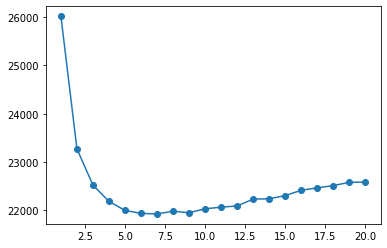

In [9]:
def sample(N):
  size=0
  totalA=0
  totalC=0
  while (size<2000):
    New=2000-size
    u=np.random.rand(New)
    x=np.random.rand(New)
    p=np.repeat(0.1,New)
    p[x<0.25]=0.05
    p[x>=0.75]=0.15 
    ad_needed=1+np.floor(np.log(u)/np.log(1-p))
    totalC+=New
    converted=(ad_needed<=N)
    size+=np.sum(converted)
    totalA+=np.sum(ad_needed[converted])+N*np.sum(~converted)
  return totalC*1.3+(totalA-totalC)*1

total_expenditures = np.array([sample(N) for N in range(1,21) for i in range(500)]).reshape(20,500).mean(axis=1)
plt.plot(range(1,21),total_expenditures,marker="o")

In [10]:
np.argmin(total_expenditures)+1

7

#Exercise 2 [16 Points]

**Setting**

Let's explore the application of a homogeneous Poisson process.


##Q1. [10 Points]

Assume that the arrival of customers follows a homogeneous Poisson process with $\lambda=1$. For every arrival, there is a probability of 0.25 that the customer makes no purchase. There is a probability of 0.75 that the number of items bought by a customer follows a Poisson distribution with $\lambda=2t$, where $t$ is the arrival time of the customer.

* Run the simulation from t=0 to t=20 and generate the number of purchases made by each customer.
* Plot the total sales over time using line plot with marker="o". Each marker represents the total sales upon the arrival. The $x$ value should be the arrival time, and $y$ should give the total number of sales made from time 0 up to this point (including the sales generated from the current customer).


15


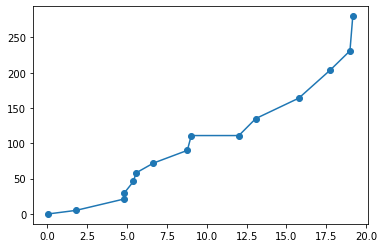

In [11]:
Narrival=np.random.poisson(20)
Arrival_times=np.sort(np.random.rand(Narrival)*20)
purchase=np.random.rand(Narrival)<0.75
purchase_counts=np.repeat(0,Narrival)
purchase_counts[purchase]=np.random.poisson(2*Arrival_times[purchase])
plt.plot(Arrival_times,np.cumsum(purchase_counts),marker="o")

print(Narrival)

##Q2. [6 Points]

The company wants to determine an optimal stock level at time 0 to ensure that they will have enough stock at t=20 at least 95% of the time. Based on simulating 10000 rounds, help them determine the stock level. 

In [12]:
def system():
  #number of arrivals
  Narrival=np.random.poisson(20)
  #generate the arrival times
  Arrival_times= np.random.rand(Narrival)*20 
  #determine which customers make purchases
  purchase=np.random.rand(Narrival)<0.75
  #for those purchase occasions, generate the number of purchases
  purchase_counts=np.random.poisson(2*Arrival_times[purchase])
  #return the total number of
  return np.sum(purchase_counts)

np.percentile([system() for i in range(10000)],95)



459.0